<a href="https://colab.research.google.com/github/farzanasupti/Virtual-TryOn/blob/main/CSE299.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# clone repository
!git clone https://github.com/lastdefiance20/TryYours-Virtual-Try-On

# install dependencies
!pip install tensorboardX av torchgeometry flask flask-ngrok iglovikov_helper_functions cloths_segmentation albumentations
!pip install scipy==1.8.0

%cd TryYours-Virtual-Try-On
# install detectron2
!python -m pip install 'git+https://github.com/facebookresearch/detectron2.git'

Cloning into 'TryYours-Virtual-Try-On'...
remote: Enumerating objects: 1113, done.
remote: Counting objects: 100% (13/13), done.
remote: Compressing objects: 100% (12/12), done.
remote: Total 1113 (delta 4), reused 9 (delta 1), pack-reused 1100
Receiving objects: 100% (1113/1113), 22.21 MiB | 9.00 MiB/s, done.
Resolving deltas: 100% (198/198), done.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.6/101.6 kB 9.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 31.0/31.0 MB 52.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.7/42.7 kB 4.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.5/64.5 kB 6.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 304.5/304.5 kB 28.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 96.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━

In [2]:
!pip install --upgrade --no-cache-dir gdown

%cd HR-VITON-main
!gdown https://drive.google.com/u/0/uc?id=1T5_YDUhYSSKPC_nZMk2NeC-XXUFoYeNy&export=download
!gdown https://drive.google.com/u/0/uc?id=1XJTCdRBOPVgVTmqzhVGFAgMm2NLkw5uQ&export=download
%cd ../

%cd Graphonomy-master
!gdown https://drive.google.com/u/0/uc?id=1eUe18HoH05p0yFUd_sN6GXdTj82aW0m9&export=download
%cd ../

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Attempting uninstall: gdown
    Found existing installation: gdown 4.6.6
    Uninstalling gdown-4.6.6:
      Successfully uninstalled gdown-4.6.6
/content/TryYours-Virtual-Try-On/HR-VITON-main
Downloading...
From (uriginal): https://drive.google.com/u/0/uc?id=1T5_YDUhYSSKPC_nZMk2NeC-XXUFoYeNy
From (redirected): https://drive.google.com/uc?id=1T5_YDUhYSSKPC_nZMk2NeC-XXUFoYeNy&confirm=t&uuid=e2be203f-dd10-4acc-8804-d917bce3f378
To: /content/TryYours-Virtual-Try-On/HR-VITON-main/gen.pth
100% 402M/402M [00:10<00:00, 39.5MB/s]
Downloading...
From (uriginal): https://drive.google.com/u/0/uc?id=1XJTCdRBOPVgVTmqzhVGFAgMm2NLkw5uQ
From (redirected): https://drive.google.com/uc?id=1XJTCdRBOPVgVTmqzhVGFAgMm2NLkw5uQ&confirm=t&uuid=b20fa93a-6db0-43f0-a9e9-602fbab7dec8
To: /content/TryYours-Virtual-Try-On/HR-VITON-main/mtviton.pth
100% 190M/190M [00:01<00:00, 118MB/s]
/content/TryYours-Virtual-Try-On


In [3]:
import os
import shutil
from google.colab import files

# Uncomment the following block if you would like to upload your own cloth images.
'''
input_dir = 'static'
uploaded = files.upload()
for filename in uploaded.keys():
  input_path = os.path.join(input_dir, filename)
  shutil.move(filename, input_path)
os.remove(input_dir+'/cloth_web.jpg')
os.rename(input_path, input_dir+'/cloth_web.jpg')
'''

"\ninput_dir = 'static'\nuploaded = files.upload()\nfor filename in uploaded.keys():\n  input_path = os.path.join(input_dir, filename)\n  shutil.move(filename, input_path)\nos.remove(input_dir+'/cloth_web.jpg')\nos.rename(input_path, input_dir+'/cloth_web.jpg')\n"

In [4]:
# Uncomment the following block if you would like to upload your own images.
'''
input_dir = 'static'
uploaded = files.upload()
for filename in uploaded.keys():
  input_path = os.path.join(input_dir, filename)
  shutil.move(filename, input_path)
os.remove(input_dir+'/origin_web.jpg')
os.rename(input_path, input_dir+'/origin_web.jpg')
'''

"\ninput_dir = 'static'\nuploaded = files.upload()\nfor filename in uploaded.keys():\n  input_path = os.path.join(input_dir, filename)\n  shutil.move(filename, input_path)\nos.remove(input_dir+'/origin_web.jpg')\nos.rename(input_path, input_dir+'/origin_web.jpg')\n"

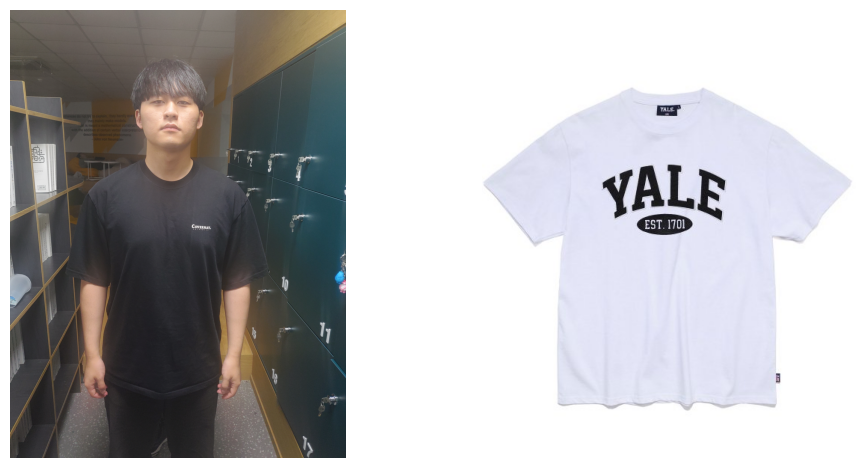

In [5]:
import matplotlib.pyplot as plt
import cv2

original = cv2.cvtColor(cv2.imread("./static/origin_web.jpg"), cv2.COLOR_BGR2RGB)
cloth = cv2.cvtColor(cv2.imread("./static/cloth_web.jpg"), cv2.COLOR_BGR2RGB)
## Display Images
fig, axes = plt.subplots(nrows=1, ncols=2)
dpi = fig.get_dpi()
fig.set_size_inches(900/ dpi, 448 / dpi)
plt.subplots_adjust(left=0, right=1, bottom=0, top=1)
axes[0].axis('off')
axes[0].imshow(original)
axes[1].axis('off')
axes[1].imshow(cloth)
plt.show()

In [6]:
!python main.py #--background False

Get mask of cloth

Downloading: "https://github.com/ternaus/cloths_segmentation/releases/download/0.0.1/weights.zip" to /root/.cache/torch/hub/checkpoints/weights.zip
100% 47.0M/47.0M [00:03<00:00, 15.5MB/s]
Get openpose coordinate using posenet

Generate semantic segmentation using Graphonomy-Master library

Constructing DeepLabv3+ model...
Number of classes: 20
Output stride: 16
Number of Input Channels: 3
load model: ./inference.pth
time used for the multi-scale image inference is :6.492093165000028

Generate Densepose image using detectron2 library

[06/20 20:57:12 apply_net]: Loading config from detectron2/projects/DensePose/configs/densepose_rcnn_R_50_FPN_s1x.yaml
[06/20 20:57:12 apply_net]: Loading model from https://dl.fbaipublicfiles.com/densepose/densepose_rcnn_R_50_FPN_s1x/165712039/model_final_162be9.pkl
model_final_162be9.pkl: 256MB [00:02, 124MB/s]               
[06/20 20:57:15 apply_net]: Loading data from origin.jpg
/usr/local/lib/python3.10/dist-packages/torch/functio

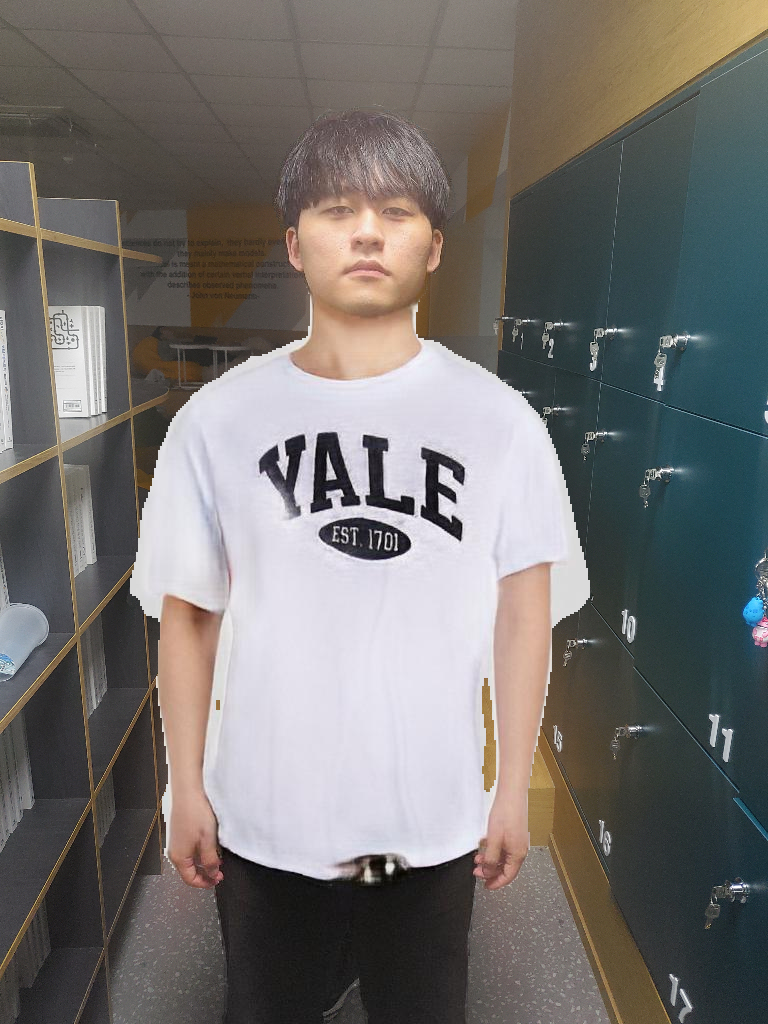

In [7]:
from PIL import Image
from IPython.display import Image

image1 = Image(filename="./static/finalimg.png")
display(image1)